# Data Science Jobs Salaries Exploration

In this notebook, i will explore the data science salaries dataset which can be found [here on kaggle](https://www.kaggle.com/datasets/ruchi798/data-science-job-salaries) to answer the following questions:
* How has the average salary of data science jobs change over time?
* What are the salaries of Data Science jobs based on experience level?
* Do Data scientist who work full time earn more than others?
* Does working in a larger company guarantee higher salary?
* How well can we predict a data science job salary?

In [1]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score


%matplotlib inline
sns.set()

## Exploration

In [2]:
# load the data
data_sal = pd.read_csv('../input/data-science-job-salaries/ds_salaries.csv')
data_sal = data_sal.iloc[:,1:]
data_sal.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [3]:
data_sal.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,6.070000e+02,607.000000,607.00000
mean,2021.405272,3.240001e+05,112297.869852,70.92257
std,0.692133,1.544357e+06,70957.259411,40.70913
min,2020.000000,4.000000e+03,2859.000000,0.00000
25%,2021.000000,7.000000e+04,62726.000000,50.00000
50%,2022.000000,1.150000e+05,101570.000000,100.00000
75%,2022.000000,1.650000e+05,150000.000000,100.00000
max,2022.000000,3.040000e+07,600000.000000,100.00000


The following can be observed from the above
> * Data is only available for the year 2020 to 2022
> *  The average salary in USD for any type or level of data scientist is approximately $112 300

In [4]:
data_sal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary              607 non-null    int64 
 5   salary_currency     607 non-null    object
 6   salary_in_usd       607 non-null    int64 
 7   employee_residence  607 non-null    object
 8   remote_ratio        607 non-null    int64 
 9   company_location    607 non-null    object
 10  company_size        607 non-null    object
dtypes: int64(4), object(7)
memory usage: 52.3+ KB


In [5]:
# counting null values
data_sal.isna().sum().sum()

0

No null values in this dataset.

### **Q1: How has the average salary of data science jobs change over time?**

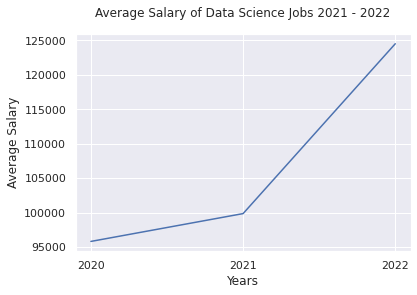

In [6]:
avg_sal_21_22=data_sal.groupby('work_year')['salary_in_usd'].mean()

sns.lineplot(x=avg_sal_21_22.index, y=avg_sal_21_22.values)

xticks = [2020, 2021, 2022]
plt.xticks(xticks, xticks)
plt.ylabel('Average Salary')
plt.xlabel('Years')
plt.title('Average Salary of Data Science Jobs 2021 - 2022', y=1.05);

The average salaries increased from approximately USD96000 in 2020 to USD100000 in 2021 and finally USD125000 in 2022. This shows a positive trend and shows that data science jobs are becoming more valuable as the years pass.

### **Q2: What are the salaries of Data Science jobs based on experience level?**

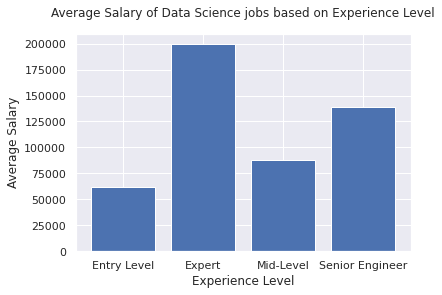

In [7]:
avg_sal_per_exp=data_sal.groupby('experience_level').mean()['salary_in_usd']
plt.bar(avg_sal_per_exp.index, avg_sal_per_exp.values)
xticks = ['Entry Level', 'Expert', 'Mid-Level', 'Senior Engineer']
xticks_loc = range(len(xticks))
plt.xticks(xticks_loc, xticks)
plt.ylabel('Average Salary')
plt.xlabel('Experience Level')
plt.title('Average Salary of Data Science jobs based on Experience Level', y=1.05);

The entry level data science jobs have much lower average salaries than the Expert levels job.

### **Q3: Do Data scientist who work full time earn more than others?**

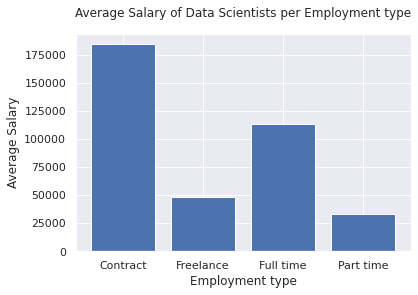

In [8]:
avg_sal_per_emp=data_sal.groupby('employment_type').mean()['salary_in_usd']
plt.bar(avg_sal_per_emp.index, avg_sal_per_emp.values)
xticks = ['Contract', 'Freelance', 'Full time', 'Part time']
xticks_loc = range(len(xticks))
plt.xticks(xticks_loc, xticks)
plt.ylabel('Average Salary')
plt.xlabel('Employment type')
plt.title('Average Salary of Data Scientists per Employment type', y=1.05);

Though Data science jobs that are `full time based` have a higher average salary than the ones that are `part time` or `freelance`, the data science jobs that are `contract based` have the highest average salary.

### **Q4: Does working in a larger company guarantee higher salary?**

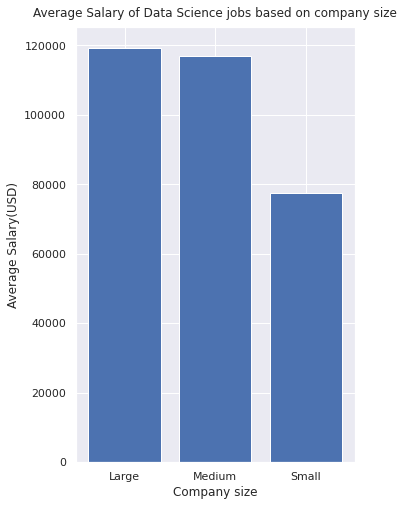

In [9]:
avg_sal_per_comp_size=data_sal.groupby('company_size').mean()['salary_in_usd']
plt.figure(figsize=(5,8))
plt.bar(avg_sal_per_comp_size.index, avg_sal_per_comp_size.values)
plt.xlabel('Company size')
plt.ylabel('Average Salary(USD)')
xticks = ['Large', 'Medium', 'Small']
plt.xticks(range(len(xticks)), xticks)
plt.title('Average Salary of Data Science jobs based on company size', y=1.01);

Data science jobs in larger sized company have a higher average salary than medium sized and small companies.
This does not necessarily imply that larger companies will always guarantee a higher salary on average. For example, within the company there will be varying levels of expertise and hence differing salary.

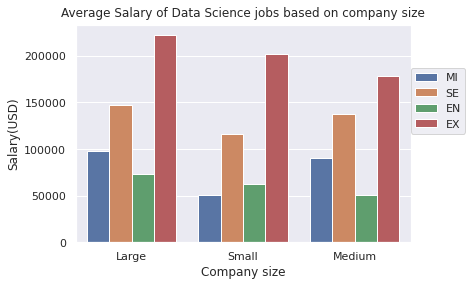

In [10]:
sns.barplot(x='company_size', y='salary_in_usd', data=data_sal, hue='experience_level', ci=0)
plt.legend(loc=(1, .5))
plt.xlabel('Company size')
plt.ylabel('Salary(USD)')
xticks = ['Large', 'Small','Medium']
plt.xticks(range(len(xticks)), xticks)
plt.title('Average Salary of Data Science jobs based on company size', y=1.01);

Exploring further shows that the data science jobs salary in larger companies for different level of expertise is higher compared to that of the medium and smaller sized companies. 

## Wrangling

In [11]:
num_cols = ['work_year', 'salary_in_usd', 'remote_ratio']
cat_cols = ['experience_level', 'employment_type', 'job_title', 'employee_residence', 'company_location', 'company_size']

data_salary_num = data_sal[num_cols]
data_salary_cat = data_sal[cat_cols]

In [12]:
data_salary_cat_dummy = pd.get_dummies(data_salary_cat, drop_first=True)
data_salary_cat_dummy.head()

,experience_level_EX,experience_level_MI,experience_level_SE,employment_type_FL,employment_type_FT,employment_type_PT,job_title_AI Scientist,job_title_Analytics Engineer,job_title_Applied Data Scientist,job_title_Applied Machine Learning Scientist,...,company_location_RO,company_location_RU,company_location_SG,company_location_SI,company_location_TR,company_location_UA,company_location_US,company_location_VN,company_size_M,company_size_S
0,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [13]:
data_sal_clean = pd.merge(data_salary_num, data_salary_cat_dummy, right_index=True, left_index=True)
data_sal_clean.head()

,work_year,salary_in_usd,remote_ratio,experience_level_EX,experience_level_MI,experience_level_SE,employment_type_FL,employment_type_FT,employment_type_PT,job_title_AI Scientist,...,company_location_RO,company_location_RU,company_location_SG,company_location_SI,company_location_TR,company_location_UA,company_location_US,company_location_VN,company_size_M,company_size_S
0,2020,79833,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2020,260000,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,2020,109024,50,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,2020,20000,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,2020,150000,50,0,0,1,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0


In [14]:
X = data_sal_clean.drop(['salary_in_usd'], axis=1)
y= data_sal_clean['salary_in_usd']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

### **Q5: How well can we predict a data science job salary?**

In [15]:
model = RandomForestRegressor(n_estimators=20, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=20, random_state=42)

In [16]:
y_train_preds=model.predict(X_train)
y_test_preds = model.predict(X_test)

In [17]:
print('Train r2:',r2_score(y_train, y_train_preds))
print('Test r2:', r2_score(y_test, y_test_preds))

Train r2: 0.828183967773426
Test r2: 0.44166753274048653


This model prediction on the dataset set is not very good. Seeing as the model performs much better on the training data than the test data, this is a clear case of overfitting.